# Haar features value measuring on black and white images 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from random import randint
from PIL import Image, ImageDraw, ImageFilter
import matplotlib.patches as patches
import glob
import os, shutil

%matplotlib inline

## Haar features array creation 

In [2]:
def edge(size, orient=0): 
    """
    Creates an edge Haar feature with specified size and orientation.

    Args:
        size (tuple): A tuple specifying the size of the feature (rows, columns).
        orient (int, optional): Orientation of the edge. 0 for row orientation (default), 1 for column orientation.

    Returns:
        tuple: A array containing the edge feature and the start and end coordinates of half of it.
    """
    if size[orient] % 2 != 0:
        size[orient] += 1
    arr_im = np.ones(size, dtype=np.intc)
    if orient:
        arr_im[:,size[1]//2:] = 0
        start = (0, size[1]//2)
        end = (size[0],size[1])
    else:
        arr_im[size[0]//2:,] = 0
        start = (size[0]//2, 0)
        end = (size[0],size[1])
    
    return arr_im, (start,end)

def line(size, orient=0):
    """
    Creates an line Haar feature with specified size and orientation.

    Args:
        size (tuple): A tuple specifying the size of the feature (rows, columns).
        orient (int, optional): Orientation of the edge. 0 for row orientation (default), 1 for column orientation.

    Returns:
        tuple: A array containing the line feature and the start and end coordinates of half of it.
    """
    while size[orient] % 3 != 0:
        size[orient] += 1
    arr_im = np.ones(size, dtype=np.intc)
    if orient:
        arr_im[:,size[1]//3:size[1]*2//3] = 0
        start = (0, size[1]//3)
        end = (size[0], size[1]*2//3)
    else:
        arr_im[size[0]//3:size[0]*2//3,:] = 0
        start = (size[0]//3, size[1]//3)
        end = (size[0]*2//3, size[1]*2//3)
    return arr_im, (start,end)

def sqr(size):
    """
    Creates an four square Haar feature with specified size.

    Args:
        size (tuple): A tuple specifying the size of the feature (rows, columns).

    Returns:
        tuple: A array containing the four square feature, the start and end of each specific part.
    """
    for orient in [0,1]:
        if size[orient] % 2 != 0:
            #print(f"Feature size {size} not odd")
            size[orient] += 1
            #print(f"Feature size modified to {size}")
    arr_im = np.ones(size, dtype=np.intc)
    arr_im[0:size[0]//2,0:size[1]//2] = 0
    arr_im[size[0]//2:size[0],size[1]//2:size[1]] = 0
    start1 = (0, 0)
    end1 = (size[0]//2, size[1]//2)
    start2=(size[0]//2,size[1]//2)
    end2 = (size[0],size[1])
    return arr_im, ((start1,end1), (start2, end2))

Edge feature
((0, 5), (5, 10))
[[1 1 1 1 1 0 0 0 0 0]
 [1 1 1 1 1 0 0 0 0 0]
 [1 1 1 1 1 0 0 0 0 0]
 [1 1 1 1 1 0 0 0 0 0]
 [1 1 1 1 1 0 0 0 0 0]]


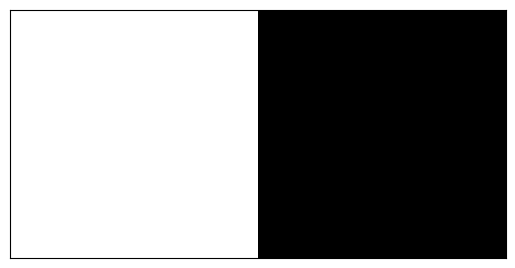

Line feature
((0, 4), (5, 8))
[[1 1 1 1 0 0 0 0 1 1 1 1]
 [1 1 1 1 0 0 0 0 1 1 1 1]
 [1 1 1 1 0 0 0 0 1 1 1 1]
 [1 1 1 1 0 0 0 0 1 1 1 1]
 [1 1 1 1 0 0 0 0 1 1 1 1]]


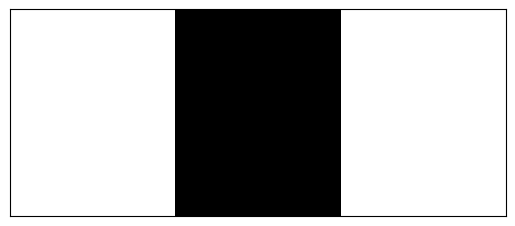

4 square feature
(((0, 0), (3, 6)), ((3, 6), (6, 12)))
[[0 0 0 0 0 0 1 1 1 1 1 1]
 [0 0 0 0 0 0 1 1 1 1 1 1]
 [0 0 0 0 0 0 1 1 1 1 1 1]
 [1 1 1 1 1 1 0 0 0 0 0 0]
 [1 1 1 1 1 1 0 0 0 0 0 0]
 [1 1 1 1 1 1 0 0 0 0 0 0]]


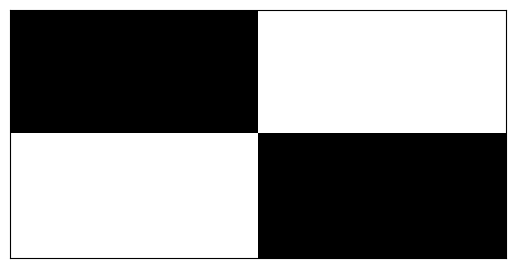

In [3]:
size = [5,10]
print("Edge feature")
shape, test = edge(size, orient=1)
print(test)
print(shape)
plt.imshow(shape, cmap="gray")
plt.xticks([], [])
plt.yticks([], [])
plt.show()
print("Line feature")
shape, test = line(size, orient=1)
print(test)
print(shape)
plt.imshow(shape, cmap="gray")
plt.xticks([], [])
plt.yticks([], [])
plt.show()
print("4 square feature")
shape, test = sqr(size)
print(test)
print(shape)
plt.imshow(shape, cmap="gray")
plt.xticks([], [])
plt.yticks([], [])
plt.show()


## Integral Image computing

In [4]:
def integral_img(image, debug=False):
    """
    Calculates the integral image of a given input image.

    Args:
        image (numpy.ndarray): The input image.
        debug (bool, optional): Whether to display debug information and plots. Defaults to False.

    Returns:
        numpy.ndarray: The integral image.
    """
    arr_img = np.array(image,dtype=np.uint64)
    before = arr_img
    integral = before.copy()
    row = integral.shape[0]
    col = integral.shape[1]
    for r in range(0,row):
        for co in range(0,col):
            if r == 0 and co == 0:
                a = 0
                b = 0
                c = 0 
            elif r == 0:
                a = 0
                b = 0
                c = integral[r,co-1]
            elif co == 0:
                a = 0
                b = integral[r-1,co]
                c = 0
            else: 
                a = integral[r-1, co-1]
                b = integral[r-1,co]
                c = integral[r,co-1]
            px = b+c+integral[r,co]-a
            integral[r,co] = px
    if debug:
        f, ax = plt.subplots(1,2)
        ax[0].imshow(integ, cmap="gray")
        ax[1].imshow(base, cmap="gray")
        plt.show()
        print("Original:")
        print(before)
        print("Integral:")
        print(integ)
    return integral


Text(0.5, 1.0, 'Original image')

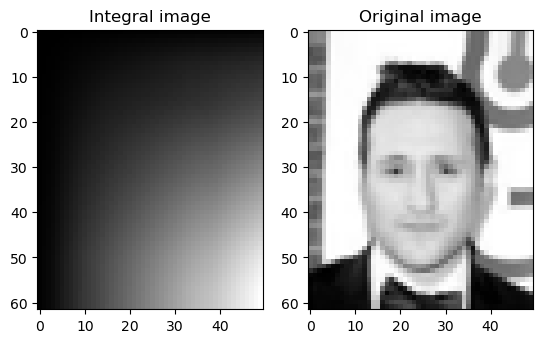

In [5]:
base = Image.open("face.png").convert('L')
base = base.resize((base.size[0]//10,base.size[1]//10))
integ = integral_img(base, False)
f, ax = plt.subplots(1,2)
ax[0].imshow(integ, cmap="gray")
ax[1].imshow(base, cmap="gray")
ax[0].set_title("Integral image")
ax[1].set_title("Original image")

In [6]:
## Area calculation of pixel sum with integral image 

In [7]:
def area_sum(start, end, arr):
    """
    Calculates the sum of pixel in a rectangular area of a given integral image.

    Args:
        start (tuple): The start coordinates of the area (row start, column start).
        end (tuple): The end coordinates of the area (row end, column end).
        arr (numpy.ndarray): The input array (integral image).

    Returns:
        int: The sum of values in the specified area.
    """
    rs, cs = start
    re, ce = end
    rs = rs -1
    cs = cs -1 
    if rs <0 or cs <0:
        A = 0
        if cs >= 0:
            C = arr[re,cs]
        else:
            C = 0
        if rs >= 0:
            B = arr[rs,ce]
        else:
            B = 0
    if cs >= 0 and rs >= 0:
        A = arr[rs, cs]
        C = arr[re,cs]
        B = arr[rs,ce]
    D = arr[re,ce]
    total = D/10000 - C/10000 - B/10000 + A/10000
    return int(total*10000)

## Haar feature value calcul on image

In [8]:
def overlay_extract(shape, type, coords, start, image, integral, show = False, roi= False, ttl =-1):
    """
    Extracts a feature of interest from the given image and calculates the difference in total area values.

    Args:
        shape (numpy.ndarray): The shape of the feature.
        type (str): The type of the feature ("edge", "line", or "sqr").
        coords (list): The coordinates of the feature.
        start (tuple): The starting coordinates of the feature within the image.
        image (numpy.ndarray): The input image.
        integral (numpy.ndarray): The integral image.
        show (bool, optional): Whether to display the overlay image and bounding boxes. Defaults to False.
        roi (bool, optional): Whether to display the feature bounding box. Defaults to False.
        ttl (int, optional): The title of the subplot image file. Defaults to -1.

    Returns:
        int: The difference in total area values.
    """

    if type =="edge":
        end = (start[0] + shape.shape[0], start[1] + shape.shape[1])
        start_zone = (start[0] + coords[0][0], start[1] + coords[0][1])
        end_zone = (start[0] + coords[1][0], start[1] + coords[1][1])
        total = area_sum(start, end, integ)
        minus = area_sum(start_zone, end_zone, integ)
        diff = total - 2*minus
    elif type =="line":
        end = (start[0] + shape.shape[0], start[1] + shape.shape[1])
        start_zone = (start[0] + coords[0][0], start[1] + coords[0][1])
        end_zone = (start[0] + coords[1][0], start[1] + coords[1][1])
        total = area_sum(start, end, integ)
        minus = area_sum(start_zone, end_zone, integ)
        diff = total - 2*minus
    elif type =="sqr":
        end = (start[0] + shape.shape[0], start[1] + shape.shape[1])
        start_zone1 = (start[0] + coords[0][0][0], start[1] + coords[0][0][1])
        end_zone1 = (start[0] + coords[0][1][0], start[1] + coords[0][1][1])
        start_zone2 = (start[0] + coords[1][0][0], start[1] + coords[1][0][1])
        end_zone2 = (start[0] + coords[1][1][0], start[1] + coords[1][1][1])
        total = area_sum(start, end, integ)
        minus = area_sum(start_zone1, end_zone1, integ) + area_sum(start_zone2, end_zone2, integ)
        diff = total - 2*minus
    
    back = image.copy()
    over = Image.fromarray(shape* 255)
    fg, ax = plt.subplots()
    back.paste(over, start)
    ax.imshow(back, cmap="gray")
    rect = patches.Rectangle((start[0]-0.5, start[1]-0.5), shape.shape[1], shape.shape[0], linewidth=1.5, edgecolor='black', facecolor='none')
    ax.add_patch(rect)
    if roi:
        rect = patches.Rectangle((roi[0][0]-0.5, roi[0][1]-0.5), roi[1][0]-roi[0][0], roi[1][1]-roi[0][1], linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        plt.title(f"Feature value:{diff:>8d}")
    if ttl != -1:
        plt.savefig(f"gif/{ttl}.png")
    
    if show:
        plt.show()
    else:
        plt.close(fg)
        
    return diff
        

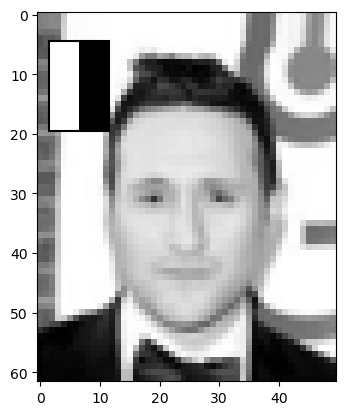

Edge feature, value=-1091


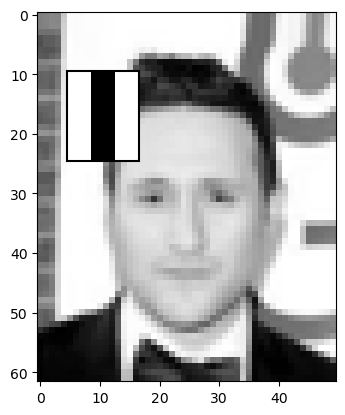

Line feature, value=10944


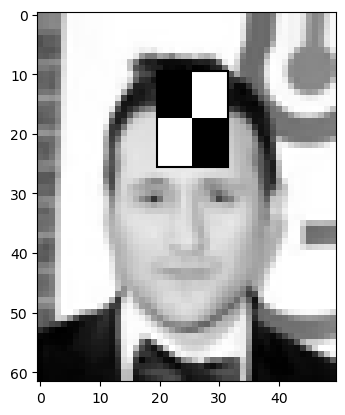

Four square feature, value=-3075


In [9]:
size = [15,10]
sp , coords = edge(size, orient=1)
df = overlay_extract(sp,"edge", coords, (2, 5), base, integ, True )
print(f"Edge feature, value={df}")
sp , coords = line(size, orient=1)
df = overlay_extract(sp,"line", coords, (5, 10), base, integ, True)
print(f"Line feature, value={df}")
sp , coords = sqr(size)
df = overlay_extract(sp,"sqr", coords, (20, 10), base, integ, True)
print(f"Four square feature, value={df}")

In [10]:
def sliding_feature(start, end,image, integ, feature,type, ttl):
    """
    Sliding window approach to extract features from an image and calculate the difference in total area values.

    Args:
        start (tuple): The starting coordinates of the sliding window.
        end (tuple): The ending coordinates of the sliding window.
        image (numpy.ndarray): The input image.
        integ (numpy.ndarray): The integral image.
        feature (tuple): A tuple containing the feature shape and coordinates.
        type (str): The type of the feature ("edge", "line", or "sqr").
        ttl (int): The title of the subplot image file.

    Returns:
        int: The updated title of the subplot image file.
    """
    max_row = end[1] - feature[0].shape[0]
    max_col = end[0] - feature[0].shape[1]    
    for start_row in range(start[1],max_row+1):
        for start_col in range(start[0],max_col+1):
            df= overlay_extract(sp,type, feature[1], (start_col, start_row), image, integ, False, (start,end), ttl= ttl)
            ttl += 1
    return ttl

In [11]:
size = [10, 12]
shutil.rmtree("gif/")
os.mkdir("gif")
ttl = 0
sp , coords = edge(size, orient=1)
ttl = sliding_feature((10,15), (30,40),base, integ, (sp,coords),"edge", ttl)
sp , coords = line(size, orient=1)
ttl = sliding_feature((10,15), (30,40),base, integ, (sp,coords),"line", ttl)
sp , coords = sqr(size)
ttl = sliding_feature((10,15), (30,40),base, integ, (sp,coords),"sqr", ttl)

In [12]:
import imageio.v2 as imageio
images = []
for filename in range(0,len(os.listdir("gif"))):
    images.append(imageio.imread(f"gif/{filename}.png"))
imageio.mimsave('movie.gif', images)